
##Looking for answers to the following to inform our actionable insights:


*   What what is the distribution of aircraft type across accidents/incidents? 

*   What is the distribution of accidents/incidents across states?

*   What is the distribution of flight type across accidents/incidents? 





##**Findings + further questions:**

* Airplanes are still in the lead even if we filter by airplanes vs other aircraft. (Wish we had departures/flight volume data to contextualize this. Perhaps it is worth looking at injury data compared to aircraft type. Even if more airplanes are involved in incidents/accidents, having fewer fatalies and injuries would bolster our points.)

* Most accidents/incidents occur in CA, TX, FL, and AK. (I don't think we can draw any conclusions from this without looking at data related to departures. More flights equals more accidents! And private flying is popular in these states.)

* The flight purpose for most of these is "personal", "nan", and instructional.  **The volume of accidents/incidents involving executive/corporate and business flights is comparatively much less. So we can recommend sticking to those audiences.**

* These are mostly accidents and not incidents, which is kind of a bummer since we can't fault the construction of these aircraft necessarily. At least not at a high level. (I'd be curious to see how that shifts or doesn't when we look at the airplanes Simon recommends.)









Importing pandas and reading in the csv.

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving df_post1996.csv to df_post1996.csv


In [3]:
df_post1996 = pd.read_csv('df_post1996.csv')

Previewing the data using various methods.

In [4]:
df_post1996.info

<bound method DataFrame.info of         Unnamed: 0           ev_id     ntsb_no     ev_date ev_type  \
0             7251  20001208X07301  IAD97FA038  1997-01-01     ACC   
1             7276  20001208X07326  MIA97LA054  1997-01-01     ACC   
2             7217  20001208X07265  CHI97LA049  1997-01-01     ACC   
3             7277  20001208X07327  MIA97LA055  1997-01-01     ACC   
4             7279  20001208X07329  MIA97LA058  1997-01-01     ACC   
...            ...             ...         ...         ...     ...   
100748      141253  20230425107122  WPR23LA165  2023-04-24     ACC   
100749      141261  20230430107167  WPR23FA172  2023-04-30     ACC   
100750      141257  20230426107154  WPR23LA168  2025-04-26     ACC   
100751       45555  20001218X45444  SEA87LA080  2048-10-24     ACC   
100752       45558  20001218X45447  LAX94LA336  2062-07-19     ACC   

        Aircraft_Key acft_category type_fly            acft_make   acft_model  \
0                NaN           NaN      NaN   

In [5]:
df_post1996.head()

,Unnamed: 0,ev_id,ntsb_no,ev_date,ev_type,Aircraft_Key,acft_category,type_fly,acft_make,acft_model,...,ev_highest_injury,inj_tot_f,inj_tot_s,inj_tot_m,inj_tot_n,wx_cond_basic,Occurrence_No,broad phase of flight,specific phase of flight,Occurrence
0,7251,20001208X07301,IAD97FA038,1997-01-01,ACC,NaN,NaN,NaN,NaN,NaN,...,FATL,1.0,NaN,NaN,NaN,IMC,NaN,NaN,NaN,NaN
1,7276,20001208X07326,MIA97LA054,1997-01-01,ACC,NaN,NaN,NaN,NaN,NaN,...,SERS,NaN,2.0,NaN,NaN,VMC,NaN,NaN,NaN,NaN
2,7217,20001208X07265,CHI97LA049,1997-01-01,ACC,NaN,NaN,NaN,NaN,NaN,...,NONE,NaN,NaN,NaN,2.0,IMC,NaN,NaN,NaN,NaN
3,7277,20001208X07327,MIA97LA055,1997-01-01,ACC,NaN,NaN,NaN,NaN,NaN,...,SERS,NaN,3.0,1.0,NaN,IMC,NaN,NaN,NaN,NaN
4,7279,20001208X07329,MIA97LA058,1997-01-01,ACC,NaN,NaN,NaN,NaN,NaN,...,NONE,NaN,NaN,NaN,2.0,VMC,NaN,NaN,NaN,NaN


In [6]:
df_post1996['type_fly'].unique

<bound method Series.unique of 0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
100748    PERS
100749     NaN
100750    PERS
100751     NaN
100752     NaN
Name: type_fly, Length: 100753, dtype: object>

In [7]:
df_post1996['type_fly'].value_counts()

PERS    53369
INST    10873
AAPL     3815
BUS      2513
POSI     2336
OWRK     1468
FLTS     1184
AOBV     1013
UNK       794
EXEC      607
FERY      533
PUBU      502
SKYD      410
ASHO      312
EXLD      289
PUBF      274
BANT      250
BUS       222
PUBL      207
PUBS      160
GLDT      118
FIRF      116
UNK        28
ADRP       27
Name: type_fly, dtype: int64

In [13]:
df_post1996['type_fly'].dtypes

dtype('O')

In [23]:
nan_count_type_fly = df_post1996['type_fly'].isna().sum()
nan_count_type_fly 

19333

In [8]:
from google.colab import files
uploaded = files.upload()

Saving OG columns tracker + taxonomy guide - type_fly.csv to OG columns tracker + taxonomy guide - type_fly.csv


In [9]:
df_type_fly_dictionary = pd.read_csv('OG columns tracker + taxonomy guide - type_fly.csv')

In [10]:
df_type_fly_dictionary.head(3) 

,Category of Data,Table,Column,ct_name,code_iaids,meaning,Data Type eADMS,Length eADMS,short_desc,Question_Def,Code meaning,typeofchange,Change_notes
0,eADMS Data,aircraft,type_fly,ct_type_fly,AAPL,Aerial Application,char,4,Type of Flying (Per_Bus / Primary),If the accident aircraft was operating under 1...,NaN,NaN,NaN
1,eADMS Data,aircraft,type_fly,ct_type_fly,ADRP,Air Drop,char,4,Type of Flying (Per_Bus / Primary),If the accident aircraft was operating under 1...,NaN,NaN,NaN
2,eADMS Data,aircraft,type_fly,ct_type_fly,AIRM,Air Medical,char,4,Type of Flying (Per_Bus / Primary),If the accident aircraft was operating under 1...,NaN,NaN,NaN


In [12]:
selected_columns = ['code_iaids','meaning']

df_type_fly_codes = df_type_fly_dictionary[selected_columns].copy()
df_type_fly_codes

,code_iaids,meaning
0,AAPL,Aerial Application
1,ADRP,Air Drop
2,AIRM,Air Medical
3,AOBV,Aerial Observation
4,ASHO,Air Race/Show
5,ATXA,Air Taxi Non-Sched.(135A)
6,ATXC,Air Taxi Commuter
7,ATXO,Air Taxi Oper./Large Aircraft
8,ATXS,Air Taxi Sched./Not Commuter
9,BANT,Banner Tow


In [15]:
#creating type_fly_dict

type_fly_dict = {
'AAPL': 'Aerial Application',
'ADRP':	'Air Drop',
'AIRM':	'Air Medical',
'AOBV':	'Aerial Observation',
'ASHO':	'Air Race/Show',
'ATXA':	'Air Taxi Non-Sched.(135A)',
'ATXC': 'Air Taxi Commuter',
'ATXO':	'Air Taxi Oper./Large Aircraft',
'ATXS':	'Air Taxi Sched./Not Commuter',
'BANT':	'Banner Tow',
 'BUS':	'Business',
'CRGO':	'All Cargo Carriers',
'EXEC':	'Executive/Corporate',
'FERY':	'Ferry',
'FLTS':	'Flight Test',
'EXLD':	'External Load',
'FIRF':	'Fire Fighting',
'GLDT':	'Glider Tow',
'HIRE':	'For Hire',
'ILGL':	'Illegal Cargo/Operation',
'INDS':	'Industrial Special',
'INST':	'Instructional',
 'OTH':	'Other',
'OWRK':	'Other Work Use',
'PERS':	'Personal',
'POSI':	'Positioning',
'PUBU':	'Public Use',
'SCAC':	'Scheduled Air Carrier',
'SCRH':	'Sched. Air Carrier Helicopter',
'SITE':	'Site Seeing',
'SKYD':	'Skydiving',
'SUPP':	'Supplemental/Commercial Oper.',
'TVLC':	'Travel Club',
 'UNK':	'Unknown'   
}

In [16]:
#making a copy to soothe my nerves
df_post1996_copy = df_post1996.copy()

In [17]:
# Create a new 'flight type' column by mapping 'type_fly' with the dictionary
df_post1996_copy['flight type'] = df_post1996_copy['type_fly'].map(type_fly_dict).fillna('Unknown')


In [19]:
# let's preview the work!
df_post1996_copy.tail(3)

,Unnamed: 0,ev_id,ntsb_no,ev_date,ev_type,Aircraft_Key,acft_category,type_fly,acft_make,acft_model,...,inj_tot_f,inj_tot_s,inj_tot_m,inj_tot_n,wx_cond_basic,Occurrence_No,broad phase of flight,specific phase of flight,Occurrence,flight type
100750,141257,20230426107154,WPR23LA168,2025-04-26,ACC,1.0,NaN,PERS,CESSNA,140,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Personal
100751,45555,20001218X45444,SEA87LA080,2048-10-24,ACC,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,UNK,NaN,NaN,NaN,NaN,Unknown purpose
100752,45558,20001218X45447,LAX94LA336,2062-07-19,ACC,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,UNK,NaN,NaN,NaN,NaN,Unknown purpose


In [20]:
# I don't like having unknown and unknown purpose
df_post1996_copy['flight type'].value_counts()

Personal               53369
Unknown purpose        23281
Instructional          10873
Aerial Application      3815
Positioning             2336
Other Work Use          1468
Flight Test             1184
Aerial Observation      1013
Executive/Corporate      607
Ferry                    533
Public Use               502
Skydiving                410
Air Race/Show            312
External Load            289
Banner Tow               250
Business                 222
Glider Tow               118
Fire Fighting            116
Unknown                   28
Air Drop                  27
Name: flight type, dtype: int64

In [21]:
#another one lol
df_post1996_copy2 = df_post1996.copy()

In [25]:
# Create a new 'flight purpose' column by mapping 'type_fly' with the dictionary and using nan instead of unknown
df_post1996_copy2['flight purpose'] = df_post1996_copy2['type_fly'].map(type_fly_dict).fillna('NaN')

In [26]:
df_post1996_copy2.head(3)

,Unnamed: 0,ev_id,ntsb_no,ev_date,ev_type,Aircraft_Key,acft_category,type_fly,acft_make,acft_model,...,inj_tot_f,inj_tot_s,inj_tot_m,inj_tot_n,wx_cond_basic,Occurrence_No,broad phase of flight,specific phase of flight,Occurrence,flight purpose
0,7251,20001208X07301,IAD97FA038,1997-01-01,ACC,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,IMC,NaN,NaN,NaN,NaN,NaN
1,7276,20001208X07326,MIA97LA054,1997-01-01,ACC,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,VMC,NaN,NaN,NaN,NaN,NaN
2,7217,20001208X07265,CHI97LA049,1997-01-01,ACC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,IMC,NaN,NaN,NaN,NaN,NaN


In [27]:
df_post1996_copy2.columns

Index(['Unnamed: 0', 'ev_id', 'ntsb_no', 'ev_date', 'ev_type', 'Aircraft_Key',
       'acft_category', 'type_fly', 'acft_make', 'acft_model', 'homebuilt',
       'num_eng', 'eng_no', 'eng_type', 'damage', 'far_part', 'regis_no',
       'ev_city', 'ev_state', 'ev_country', 'latitude', 'longitude',
       'ev_nr_apt_id', 'apt_name', 'ev_highest_injury', 'inj_tot_f',
       'inj_tot_s', 'inj_tot_m', 'inj_tot_n', 'wx_cond_basic', 'Occurrence_No',
       'broad phase of flight', 'specific phase of flight', 'Occurrence',
       'flight purpose'],
      dtype='object')

In [28]:
# updating our dataframe to replace 'type_fly' with 'flight purpose', ditching the unnamed junk google drive creates
selected_columns = ['ev_id', 'ntsb_no', 'ev_date', 'ev_type', 'Aircraft_Key',
       'acft_category', 'flight purpose', 'acft_make', 'acft_model', 'homebuilt',
       'num_eng', 'eng_no', 'eng_type', 'damage', 'far_part', 'regis_no',
       'ev_city', 'ev_state', 'ev_country', 'latitude', 'longitude',
       'ev_nr_apt_id', 'apt_name', 'ev_highest_injury', 'inj_tot_f',
       'inj_tot_s', 'inj_tot_m', 'inj_tot_n', 'wx_cond_basic', 'Occurrence_No',
       'broad phase of flight', 'specific phase of flight', 'Occurrence']

df_post1996 = df_post1996_copy2[selected_columns].copy()
       

In [29]:
# previewing the result
df_post1996.head(3)

,ev_id,ntsb_no,ev_date,ev_type,Aircraft_Key,acft_category,flight purpose,acft_make,acft_model,homebuilt,...,ev_highest_injury,inj_tot_f,inj_tot_s,inj_tot_m,inj_tot_n,wx_cond_basic,Occurrence_No,broad phase of flight,specific phase of flight,Occurrence
0,20001208X07301,IAD97FA038,1997-01-01,ACC,NaN,NaN,NaN,NaN,NaN,NaN,...,FATL,1.0,NaN,NaN,NaN,IMC,NaN,NaN,NaN,NaN
1,20001208X07326,MIA97LA054,1997-01-01,ACC,NaN,NaN,NaN,NaN,NaN,NaN,...,SERS,NaN,2.0,NaN,NaN,VMC,NaN,NaN,NaN,NaN
2,20001208X07265,CHI97LA049,1997-01-01,ACC,NaN,NaN,NaN,NaN,NaN,NaN,...,NONE,NaN,NaN,NaN,2.0,IMC,NaN,NaN,NaN,NaN


In [30]:
# exporting to csv for backup purposes
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/df_post1996.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_post1996.to_csv(f)

Mounted at /content/drive


In [14]:
#looks like we have some leading or trailing spaces in the AIR category
df_post1996['acft_category'].value_counts()

AIR     51441
AIR     27593
HELI     9019
GLI       872
GYRO      479
BALL      467
GLI       445
WSFT      378
PPAR      202
ULTR       75
BLIM       26
UNK        17
PLFT       12
RCKT        1
Name: acft_category, dtype: int64

In [31]:
# let's clean those up!
# first a copy

df_post1996_v3 = df_post1996.copy()

In [33]:
# strip leading and trailing spaces
# note: this only works on strings

df_post1996_v3['acft_category']= df_post1996_v3['acft_category'].str.strip()


In [34]:
# now let's see if that took care of the 2 AIR issue... it did! sweet!!
df_post1996_v3['acft_category'].value_counts()

AIR     79034
HELI     9019
GLI      1317
GYRO      479
BALL      467
WSFT      378
PPAR      202
ULTR       75
BLIM       26
UNK        17
PLFT       12
RCKT        1
Name: acft_category, dtype: int64

In [24]:
# counting the nans
nan_count_aircraft_cat = df_post1996['acft_category'].isna().sum()
nan_count_aircraft_cat

9726

In [35]:
# creating aircraft category dictionary

aircraft_category_dict = {
    
 'AIR': 'Airplane',    
'HELI': 'Helicopter',
 'GLI': 'Glider',
'GYRO': 'Gyrocraft',
'BALL': 'Balloon',
'WSFT': 'Weight shift',
'PPAR': 'Powered parachute',
'ULTR': 'Ultralight',
'BLIM': 'Blimp',
 'UNK': 'Unknown',
'PLFT': 'Powered-Lift',
'RCKT': 'Rocket'

}


In [36]:
# Create a new 'aircraft category' column by mapping 'acft_category' with the dictionary and using nan for missing values
df_post1996_v3['aircraft category'] = df_post1996_v3['acft_category'].map(aircraft_category_dict).fillna('NaN')

In [40]:
# Let's check it out!

df_post1996_v3['aircraft category'].value_counts()

Airplane             79034
NaN                   9726
Helicopter            9019
Glider                1317
Gyrocraft              479
Balloon                467
Weight shift           378
Powered parachute      202
Ultralight              75
Blimp                   26
Unknown                 17
Powered-Lift            12
Rocket                   1
Name: aircraft category, dtype: int64

In [44]:
# counting the nans again
# guess the NaN doesn;t show up as nan anymore since it's a string? hmmmmm
nan_count_aircraft_cat = df_post1996_v3['aircraft category'].isna().sum()
nan_count_aircraft_cat

0

In [41]:
# maintaining the column order, replacing the old acft category column with our new one

selected_columns = ['ev_id', 'ntsb_no', 'ev_date', 'ev_type', 'Aircraft_Key',
       'aircraft category', 'flight purpose', 'acft_make', 'acft_model', 'homebuilt',
       'num_eng', 'eng_no', 'eng_type', 'damage', 'far_part', 'regis_no',
       'ev_city', 'ev_state', 'ev_country', 'latitude', 'longitude',
       'ev_nr_apt_id', 'apt_name', 'ev_highest_injury', 'inj_tot_f',
       'inj_tot_s', 'inj_tot_m', 'inj_tot_n', 'wx_cond_basic', 'Occurrence_No',
       'broad phase of flight', 'specific phase of flight', 'Occurrence']

df_post1996 = df_post1996_v3[selected_columns].copy()

In [42]:
# exporting to csv for backup purposes
# no need to mount the google drive again
#from google.colab import drive
#drive.mount('/content/drive')
path = '/content/drive/My Drive/df_post1996.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_post1996.to_csv(f)

Let's plot some charts for our analysis!

In [45]:
import matplotlib.pyplot as plt

In [47]:
df_post1996['ev_id'].value_counts()

20140827X25654    18
20170524X02223    16
20190813X05139    16
20130404X60734    16
20150514X24409    16
                  ..
20031231X02105     1
20031001X01637     1
20030924X01584     1
20030826X01400     1
20001218X45447     1
Name: ev_id, Length: 48024, dtype: int64

In [48]:
#need to make a dataframe of unique events for my barcharts

df_unique_events = df_post1996.drop_duplicates(subset='ev_id')


<Axes: >

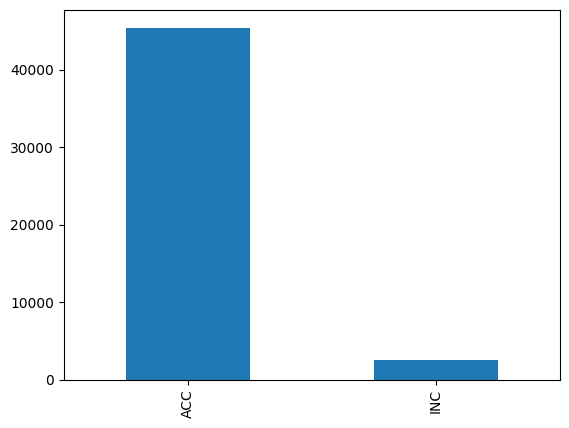

In [49]:
# quick and dirty bar chart to show accidents vs incidents
df_unique_events['ev_type'].value_counts().plot.bar()


<Axes: >

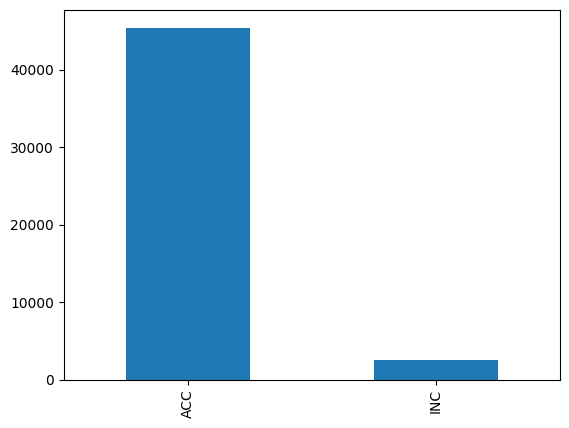

In [64]:
#sanity check with the other filtered df, pretty same-y
df_unique_aircraft_event['ev_type'].value_counts().plot.bar()

In [52]:
# creating a unique aircraft event dataframe based on event ID and aircraft key 
#so as not to repeat records where in each record is representative of another step in the 
# sequence of events
df_unique_aircraft_event = df_post1996.drop_duplicates(subset=['ev_id', 'Aircraft_Key'])


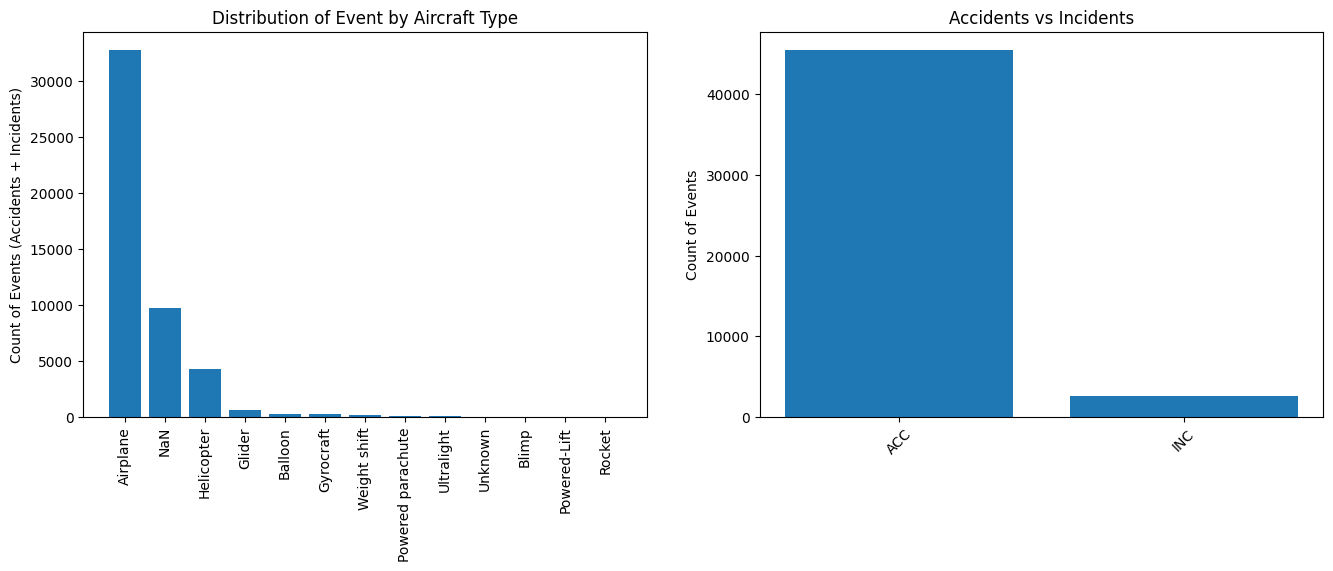

In [63]:
# set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# create variables for easier reuse
aircraft_type_counts = df_unique_aircraft_event['aircraft category'].value_counts()
event_type_counts = df_unique_aircraft_event['ev_type'].value_counts()

# plot data
ax1.bar(aircraft_type_counts.index, aircraft_type_counts.values)
ax2.bar(event_type_counts.index, event_type_counts.values)

# customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Count of Events (Accidents + Incidents)")
ax2.set_ylabel("Count of Events")
ax1.set_title("Distribution of Event by Aircraft Type")
ax2.set_title("Accidents vs Incidents");


In [73]:
# Calculate value counts for all categories
category_counts = df_unique_aircraft_event['aircraft category'].value_counts()

# Get the count for 'Airplane'
airplane_counts = category_counts['Airplane']

# Calculate the sum of all other counts
other_counts = category_counts.sum() - airplane_counts


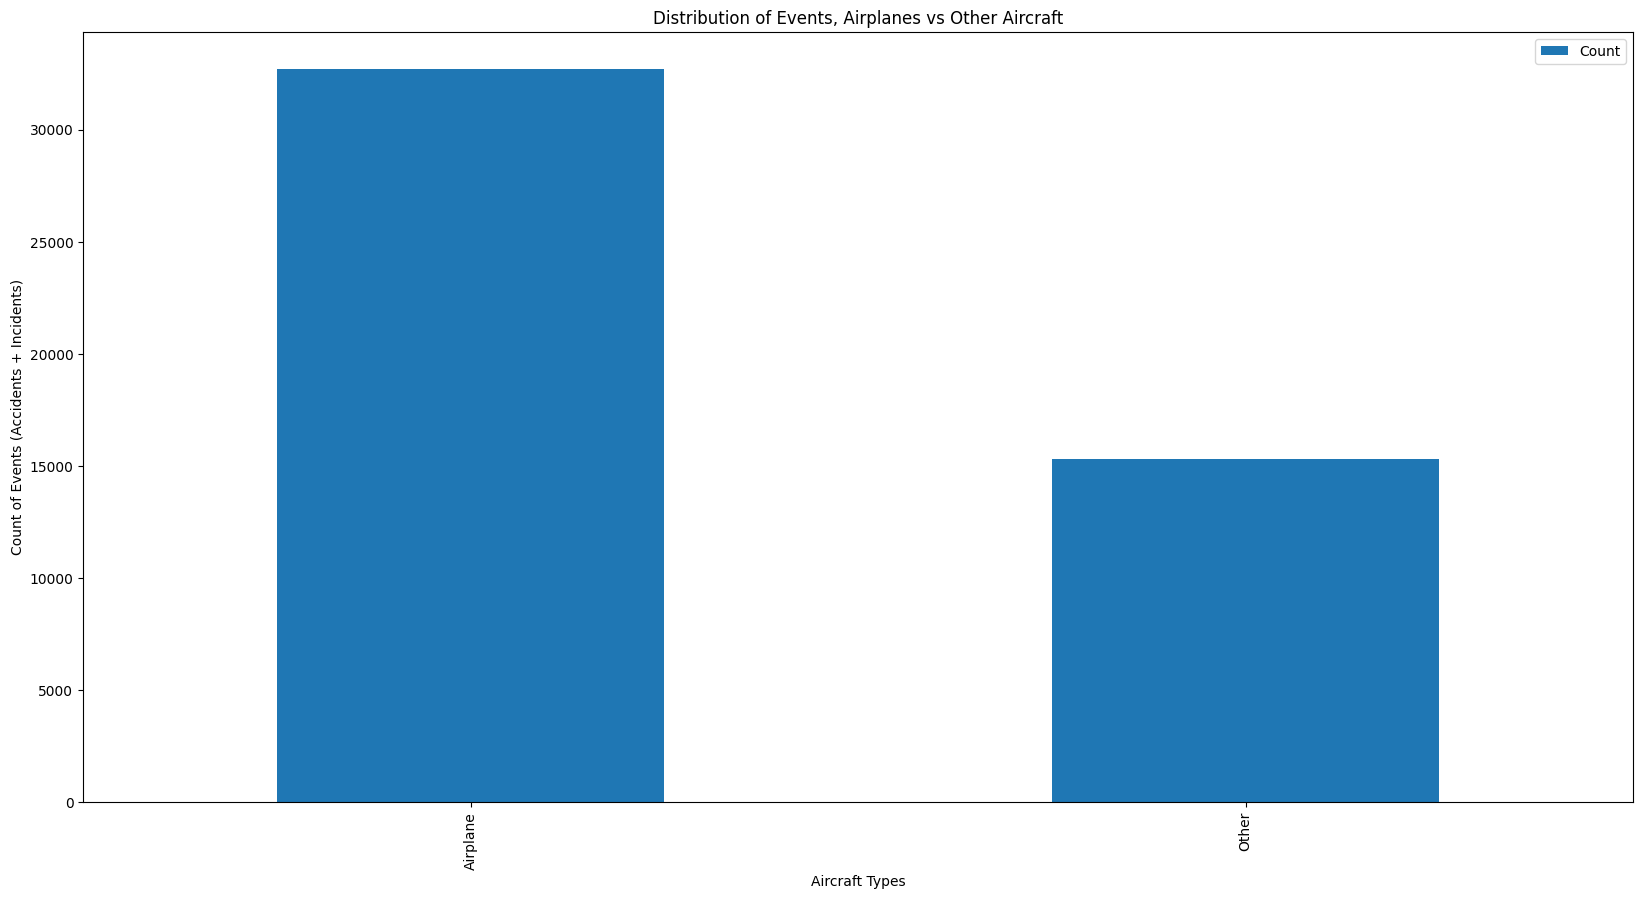

In [72]:
# Create a DataFrame with the counts
df_counts = pd.DataFrame({
    'Category': ['Airplane', 'Other'],
    'Count': [airplane_counts, other_counts]
})

# Plot a bar chart
ax = df_counts.plot.bar(x='Category', y='Count', figsize=(20,10))

# Customize appearance
ax.set_ylabel("Count of Events (Accidents + Incidents)")
ax.set_xlabel("Aircraft Types")
ax.set_title("Distribution of Events, Airplanes vs Other Aircraft");



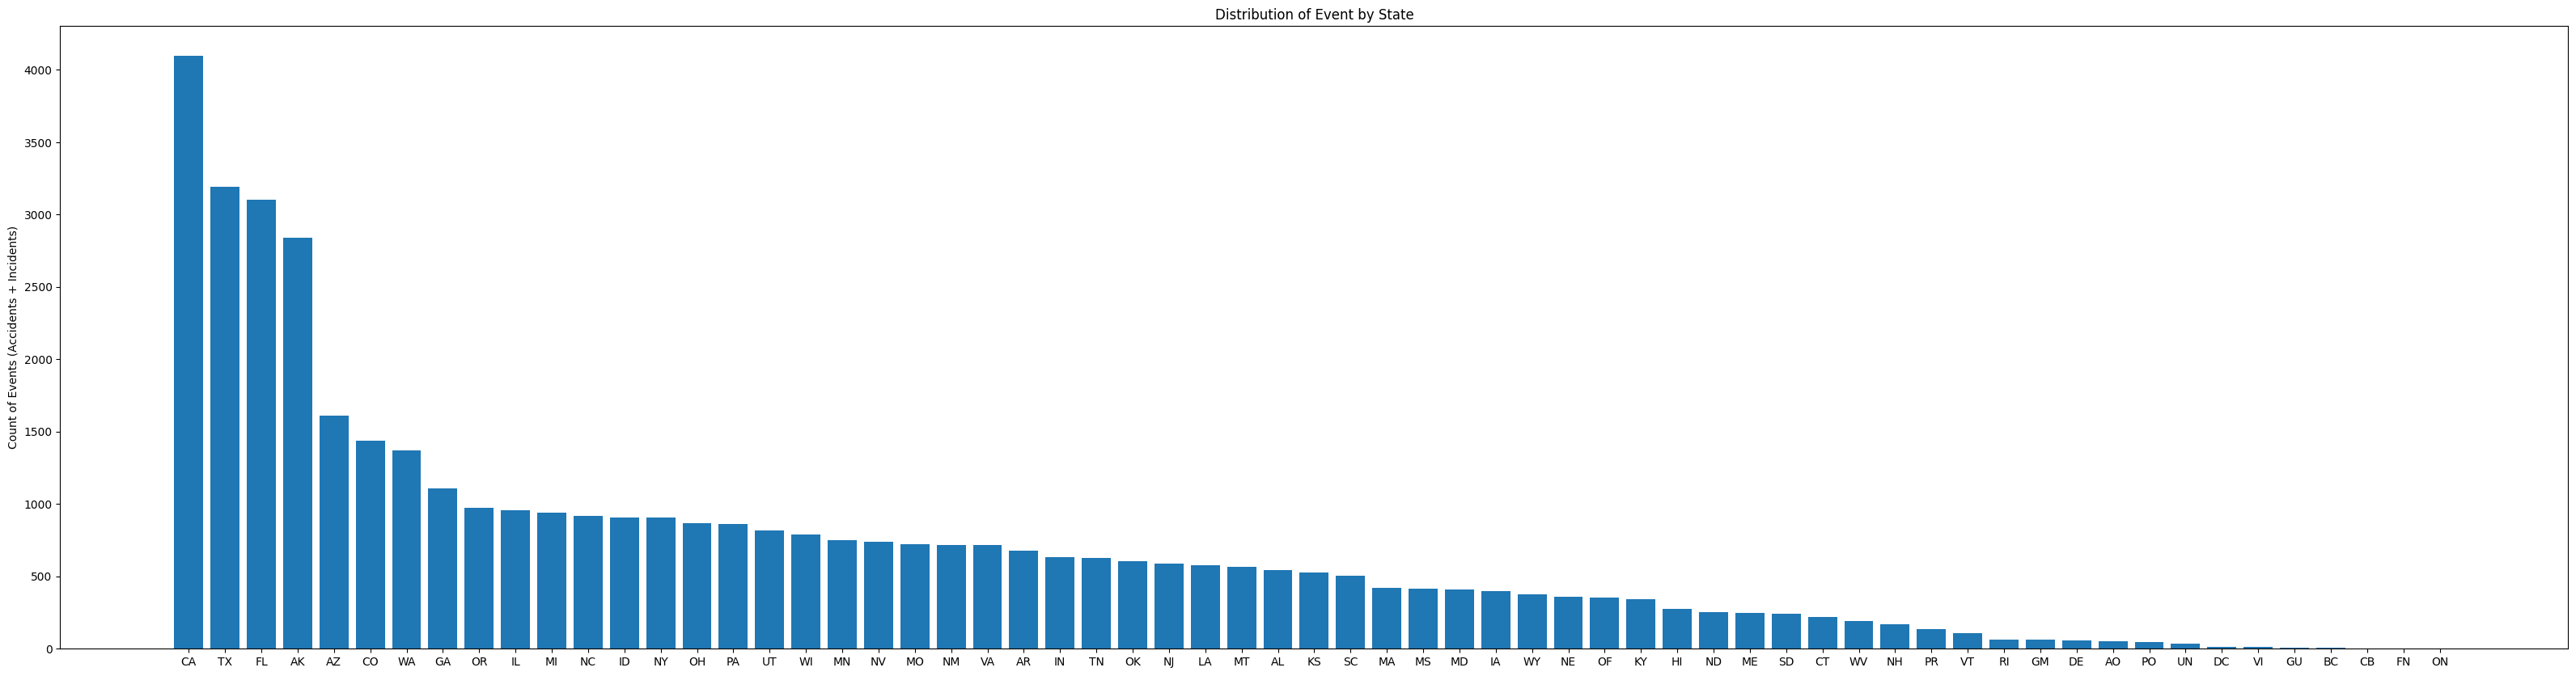

In [62]:
# set up plots
fig, ax = plt.subplots(figsize=(40,10))


# create variable for easier reuse
event_state_counts = df_unique_aircraft_event['ev_state'].value_counts()


# plot data
ax.bar(event_state_counts.index, event_state_counts.values)


# customize appearance

ax.set_ylabel("Count of Events (Accidents + Incidents)")

ax.set_title("Distribution of Event by State");

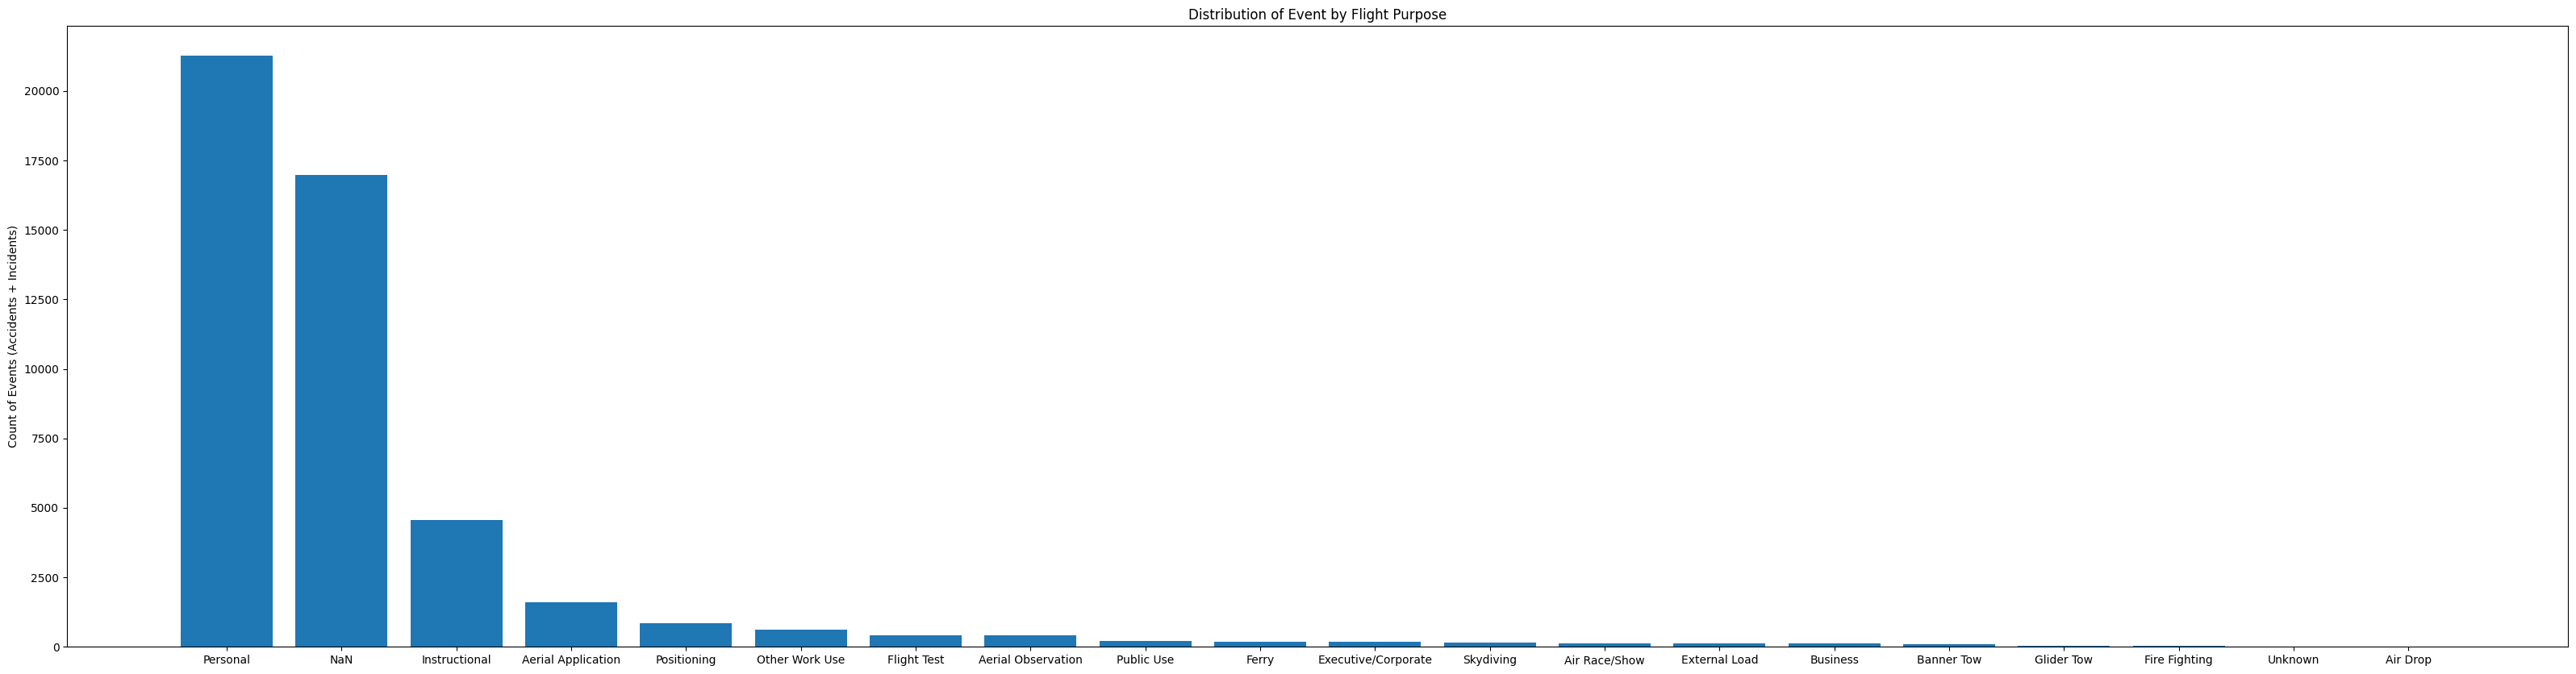

In [61]:
# set up plots
fig, ax = plt.subplots(figsize=(40,10))


# create variable for easier reuse
flight_purpose_counts = df_unique_aircraft_event['flight purpose'].value_counts()


# plot data
ax.bar(flight_purpose_counts.index, flight_purpose_counts.values)


# customize appearance

ax.set_ylabel("Count of Events (Accidents + Incidents)")

ax.set_title("Distribution of Event by Flight Purpose");



